In [1]:
import os
os.chdir(r'/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter')
from MHS.F_model_training import *
from math import radians, cos, sin, asin, sqrt
from vision.misc.help_func import go_up_n_levels

os.chdir(r'/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter/MHS')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from vision.tools.jupyter_notebooks import notebook_analysis_help_funcs 
from MHS.scoring import cross_validate_with_mean

/home/fruitspec-lab/anaconda3/envs/FsCounter/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import importlib
importlib.reload(notebook_analysis_help_funcs)
from vision.tools.jupyter_notebooks.notebook_analysis_help_funcs import *

In [3]:
df = pd.read_csv("/media/fruitspec-lab/TEMP SSD/Tomato/Size/size_to_weight.csv")
df

,variety,width,height,weight,color,id,surface,date
0,Ikram,68.98,53.66,145.81,NaN,NaN,3701.4668,NaN
1,Ikram,69.31,55.85,140.88,NaN,NaN,3870.9635,NaN
2,Ikram,63.91,55.42,115.05,NaN,16.0,3541.8922,NaN
3,Ikram,63.20,55.48,110.52,NaN,NaN,3506.3360,NaN
4,Ikram,66.33,55.30,121.73,NaN,NaN,3668.0490,NaN
...,...,...,...,...,...,...,...,...
823,286,61.99,50.33,114.20,NaN,NaN,3119.9567,200323.0
824,286,59.35,53.00,111.39,NaN,NaN,3145.5500,200323.0
825,286,59.45,50.71,101.41,NaN,NaN,3014.7095,200323.0
826,286,59.90,55.13,117.21,NaN,NaN,3302.2870,200323.0


In [4]:
df["width^2"] = df["width"]**2
df["width_height"] = df["width"]*df["height"]
df["avg_width_height"] = df["width"]/2 +df["height"]/2

<Figure size 1000x600 with 0 Axes>

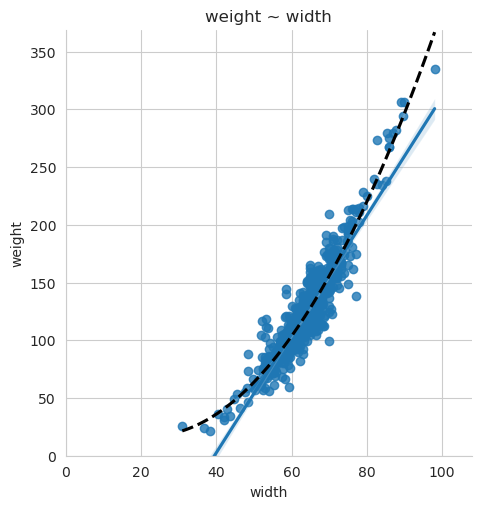

In [5]:
plot_F_cv(df, col = "width", title = "weight ~ width", add_xy_line=False, y="weight", order=2)

<Figure size 1000x600 with 0 Axes>

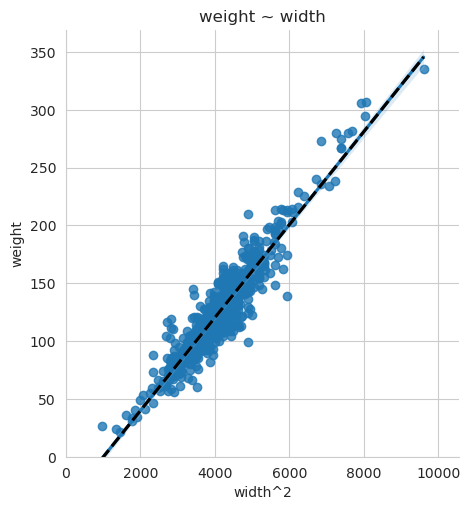

In [6]:
plot_F_cv(df, col = "width^2", title = "weight ~ width", add_xy_line=False, y="weight")

<Figure size 1000x600 with 0 Axes>

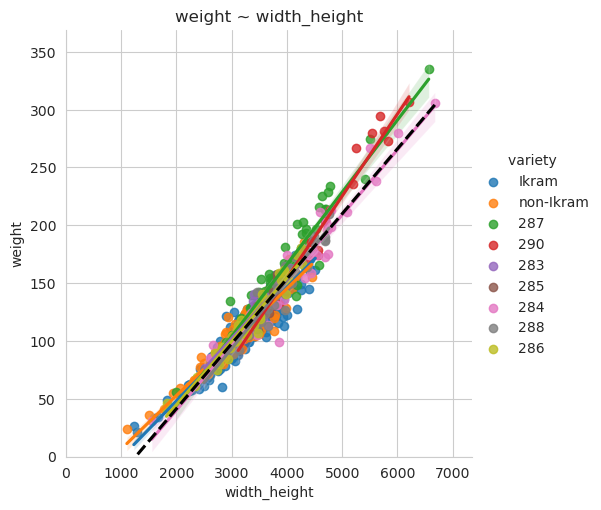

In [7]:
plot_F_cv(df, col = "width_height", title = "weight ~ width_height", add_xy_line=False, y="weight", hue = "variety ")

<Figure size 1000x600 with 0 Axes>

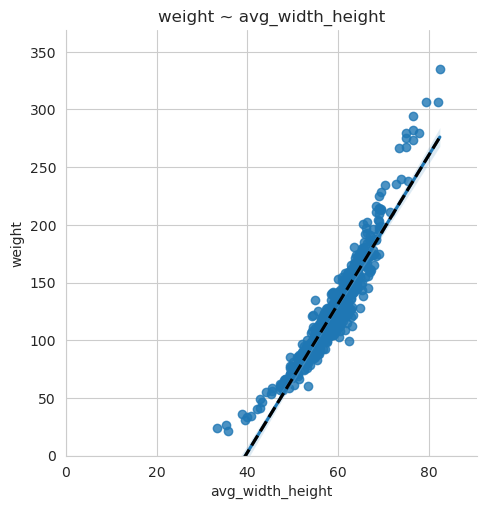

In [8]:
plot_F_cv(df, col = "avg_width_height", title = "weight ~ avg_width_height", add_xy_line=False, y="weight")

<Figure size 1000x600 with 0 Axes>

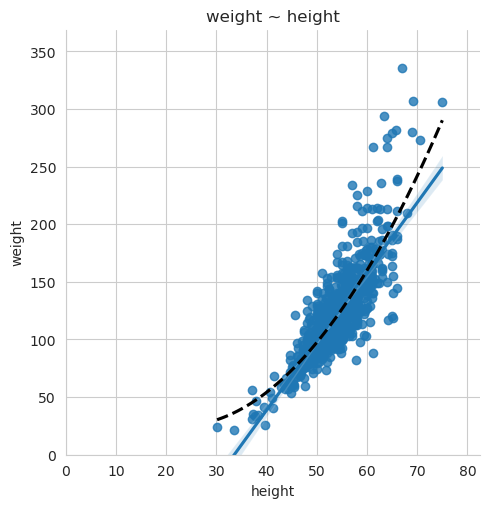

In [9]:
plot_F_cv(df, col = "height", title = "weight ~ height", add_xy_line=False, y="weight", order=2)

# Modeling

In [10]:
from sklearn import ensemble, linear_model, naive_bayes, neural_network, neighbors, svm, tree
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostClassifier, CatBoostRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.preprocessing import RobustScaler
from MHS.model_hybrid_selector import LassoSelector
from sklearn.pipeline import Pipeline

In [12]:
["width", "height", "width^2", "width_height", "avg_width_height"]

['width', 'height', 'width^2', 'width_height', 'avg_width_height']

In [13]:
X = df[["width", "height"]]
y = df["weight"]
cross_validate_with_mean(LinearRegression(), X=X, y=y, sum_as_mean=True)

true: 122.8365060240964,    pred: 122.51225621286599. (0.26 %) 
true: 129.45036144578316,    pred: 128.99413058733512. (0.35 %) 
true: 126.27216867469882,    pred: 128.009634345512. (1.38 %) 
true: 127.56325301204816,    pred: 126.55576205667583. (0.79 %) 
true: 115.57734939759038,    pred: 114.91729081869153. (0.57 %) 
true: 121.71204819277109,    pred: 123.64356762104916. (1.59 %) 
true: 121.2320481927711,    pred: 120.57181527314675. (0.54 %) 
true: 119.77337349397591,    pred: 120.97617535492792. (1.00 %) 
true: 124.23121951219511,    pred: 123.36858272644598. (0.69 %) 
true: 120.88036585365855,    pred: 119.54443026106752. (1.11 %) 
0.08089308594974381 0.02139811461253885


(0.008288612406638462, 0.004115920889499273)

In [14]:
X = df[["width", "height", "width^2"]]
cross_validate_with_mean(LinearRegression(), X=X, y=y, sum_as_mean=True)

true: 122.8365060240964,    pred: 122.91594824383152. (0.06 %) 
true: 129.45036144578316,    pred: 129.4022935013735. (0.04 %) 
true: 126.27216867469882,    pred: 126.56546648337. (0.23 %) 
true: 127.56325301204816,    pred: 126.56306273558826. (0.78 %) 
true: 115.57734939759038,    pred: 115.7576371652338. (0.16 %) 
true: 121.71204819277109,    pred: 122.64171828373149. (0.76 %) 
true: 121.2320481927711,    pred: 120.57997960823381. (0.54 %) 
true: 119.77337349397591,    pred: 119.94583148394526. (0.14 %) 
true: 124.23121951219511,    pred: 125.41168377742808. (0.95 %) 
true: 120.88036585365855,    pred: 119.83023672473902. (0.87 %) 
0.05802111864976857 0.008711985073925137
40.41339161876979 [-5.40529411  2.49951892  0.0713591 ]


In [21]:
X = df[["width", "height", "width_height"]]
cross_validate_with_mean(LinearRegression(), X=X, y=y, sum_as_mean=True)
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_, lm.coef_)

true: 122.8365060240964,    pred: 122.85006096036952. (0.01 %) 
true: 129.45036144578316,    pred: 129.30273383358852. (0.11 %) 
true: 126.27216867469882,    pred: 126.36071689786303. (0.07 %) 
true: 127.56325301204816,    pred: 127.0816539880913. (0.38 %) 
true: 115.57734939759038,    pred: 115.99777744921238. (0.36 %) 
true: 121.71204819277109,    pred: 123.01110860411286. (1.07 %) 
true: 121.2320481927711,    pred: 120.19569397591977. (0.85 %) 
true: 119.77337349397591,    pred: 120.65351042076702. (0.73 %) 
true: 124.23121951219511,    pred: 124.18099021265441. (0.04 %) 
true: 120.88036585365855,    pred: 119.67381349577266. (1.00 %) 
0.05973099613512415 0.008081164527478282
115.16989566297488 [-2.10475268 -4.29288158  0.10813299]


In [61]:
X = df[["width", "height", "width_height"]]
cross_validate_with_mean(ensemble.RandomForestRegressor(n_estimators = 1000), X=X, y=y, sum_as_mean=True)

true: 122.8365060240964,    pred: 121.88040390026767. (0.78 %) 
true: 129.45036144578316,    pred: 129.5316893623066. (0.06 %) 
true: 126.27216867469882,    pred: 126.50315042663483. (0.18 %) 
true: 127.56325301204816,    pred: 127.38236625774537. (0.14 %) 
true: 115.57734939759038,    pred: 115.91373360639538. (0.29 %) 
true: 121.71204819277109,    pred: 122.97576271803263. (1.04 %) 
true: 121.2320481927711,    pred: 121.50977452452668. (0.23 %) 
true: 119.77337349397591,    pred: 120.03024558387243. (0.21 %) 
true: 124.23121951219511,    pred: 124.56135644812231. (0.27 %) 
true: 120.88036585365855,    pred: 119.17182680431985. (1.41 %) 
0.06306213863010066 0.005971034442462872


(0.004617942131990557, 0.004313214264182363)

In [47]:
X = df[["width", "height", "width_height"]]
cross_validate_with_mean(tree.DecisionTreeRegressor(min_samples_leaf = 10), X=X, y=y, sum_as_mean=True)


true: 122.8365060240964,    pred: 123.06449310671361. (0.19 %) 
true: 129.45036144578316,    pred: 129.56976920860333. (0.09 %) 
true: 126.27216867469882,    pred: 126.97368589070494. (0.56 %) 
true: 127.56325301204816,    pred: 126.56785960063142. (0.78 %) 
true: 115.57734939759038,    pred: 117.1538692446964. (1.36 %) 
true: 121.71204819277109,    pred: 122.96269796375124. (1.03 %) 
true: 121.2320481927711,    pred: 121.09580492474885. (0.11 %) 
true: 119.77337349397591,    pred: 120.27268117112321. (0.42 %) 
true: 124.23121951219511,    pred: 123.95118070678112. (0.23 %) 
true: 120.88036585365855,    pred: 119.77339263021574. (0.92 %) 
0.06621275373690103 0.007487143645935517


(0.00567574022559624, 0.004160998632782039)

In [60]:
X = df[["width", "height", "width_height"]]
cross_validate_with_mean(XGBRegressor(n_estimators = 1000, max_depth = 1), X=X, y=y, sum_as_mean=True)

true: 122.8365060240964,    pred: 122.49755096435547. (0.28 %) 
true: 129.45036144578316,    pred: 129.63160705566406. (0.14 %) 
true: 126.27216867469882,    pred: 126.38568115234375. (0.09 %) 
true: 127.56325301204816,    pred: 127.47945404052734. (0.07 %) 
true: 115.57734939759038,    pred: 115.62237548828125. (0.04 %) 
true: 121.71204819277109,    pred: 122.59320068359375. (0.72 %) 
true: 121.2320481927711,    pred: 121.4039077758789. (0.14 %) 
true: 119.77337349397591,    pred: 119.955810546875. (0.15 %) 
true: 124.23121951219511,    pred: 124.01856994628906. (0.17 %) 
true: 120.88036585365855,    pred: 118.90784454345703. (1.63 %) 
0.06204298725247587 0.006178520531952757


(0.003431509350780221, 0.004681469955043229)

In [23]:
X = df[["width", "height", "width_height"]]
cross_validate_with_mean(LGBMRegressor(), X=X, y=y, sum_as_mean=True)

true: 122.8365060240964,    pred: 123.16970333817771. (0.27 %) 
true: 129.45036144578316,    pred: 128.999407986735. (0.35 %) 
true: 126.27216867469882,    pred: 126.3386637433369. (0.05 %) 
true: 127.56325301204816,    pred: 127.46619242897584. (0.08 %) 
true: 115.57734939759038,    pred: 116.88041371966186. (1.13 %) 
true: 121.71204819277109,    pred: 123.12730432101367. (1.16 %) 
true: 121.2320481927711,    pred: 120.7290736254131. (0.41 %) 
true: 119.77337349397591,    pred: 120.7443324316013. (0.81 %) 
true: 124.23121951219511,    pred: 124.33164352803414. (0.08 %) 
true: 120.88036585365855,    pred: 119.32617016294623. (1.29 %) 
0.07035680654064853 0.008626697691857676


(0.005630706893484624, 0.0046315795578690064)